# Dedalus script for quick plotting DeepEqWaves simulations
## Ryan Holmes

In [1]:
# Load modules
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from scipy.special import erf
from scipy.interpolate import spline
from scipy import signal

In [2]:
matplotlib.style.use('seaborn-colorblind')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('figure', facecolor='white')
plt.rc('font', size =14)
plt.rc('axes', facecolor='white')
plt.rc('savefig', facecolor='white')
plt.rc('xtick', direction='in')
plt.rc('ytick', direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
panlabs = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)','(m)','(n)','(o)','(p)','(q)']

## Analyse runs

In [3]:
basedir = '/srv/ccrc/data03/z3500785/DeepEqWaves/hhres_10day/';
# display file contents
with h5py.File(basedir + 'snapshots/snapshots_s1.h5', mode='r') as file:
    print(list(file['scales'].keys()))
    print(list(file['tasks'].keys()))

['Tz', 'constant', 'iteration', 'ky', 'sim_time', 'timestep', 'wall_time', 'world_time', 'write_number', 'y', 'z']
['b', 'bz', 'invRi', 'p', 'u', 'uz', 'v', 'w', 'zeta']


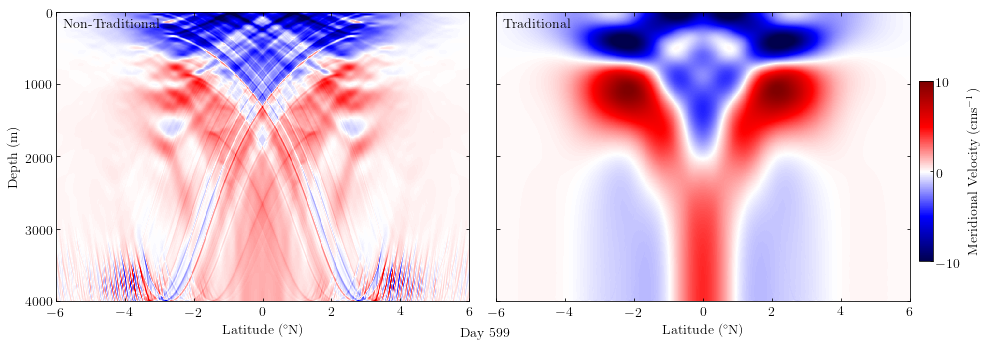

In [18]:
fig = plt.figure(figsize=(13, 5))
ax1 = plt.subplot(1,2,1);
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Latitude ($^\circ$N)')
ax1.set_xlim([-6.,6.])
ax1.set_ylim([-4000.,0.])
ax1.set_yticks([-4000.,-3000,-2000.,-1000.,0.])
ax1.set_yticklabels(['4000','3000','2000','1000','0'])
ax1.text(-5.8,-230.,'Non-Traditional')
daytxt = ax1.text(5.75,-4500.,'Day %03d' % 0)
ax2 = plt.subplot(1,2,2);
ax2.set_xlabel('Latitude ($^\circ$N)')
ax2.set_xlim([-6.,6.])
ax2.set_ylim([-4000.,0.])
ax2.set_yticks([-4000.,-3000,-2000.,-1000.,0.])
ax2.set_yticklabels([])
ax2.text(-5.8,-230.,'Traditional')
plt.tight_layout()

lscale = np.sin(1./180.*np.pi)*6378.
basedir = '/srv/ccrc/data03/z3500785/DeepEqWaves/';
nameNTbase = basedir + 'hhres_10day/snapshots/snapshots_s';
nameTbase = basedir + 'hhres_10day_trad/snapshots/snapshots_s';
savedir = '/home/z3500785/Cloud/Research/Data_Analysis/DeepEqWaves/Dedalus/savedir/hhres_combined/'

nsets = 6; # number of sets
frame = 1; # frame number (counter)

for n in range(nsets):
    nameNT = nameNTbase + '%01d.h5' % (n+1)
    nameT = nameTbase + '%01d.h5' % (n+1)
    
    with h5py.File(nameNT, mode='r') as file:
        y = file['scales/y/1.0'][:];z = file['scales/z/1.0'][:];
        ym, zm = np.meshgrid(y,z)
        day = file['scales/sim_time'][:]/24.;

    if n==0:
        with h5py.File(nameNT, mode='r') as file:
            var = file['tasks/v'][0,:,:]
            p1 = ax1.pcolormesh(ym/lscale, (zm-4.)*1000., var.T/60./60.*1000.*100., cmap='seismic',vmin=-10.,vmax=10.)
            
        with h5py.File(nameT, mode='r') as file:
            var = file['tasks/v'][0,:,:]
            p2 = ax2.pcolormesh(ym/lscale, (zm-4.)*1000., var.T/60./60.*1000.*100., cmap='seismic',vmin=-10.,vmax=10.)
        cbar_ax = fig.add_axes([0.99, 0.25, 0.015, 0.5])
        cbar = fig.colorbar(p1, cax=cbar_ax)
        cbar.set_ticks([-10.,0.,10.])
        cbar.set_label('Meridional Velocity (cms$^{-1}$)')
            
    for ti in range(len(day)):
        with h5py.File(nameNT, mode='r') as file:
            var = file['tasks/v'][ti,:,:].T/60./60.*1000.*100.
            p1.set_array(var[:-1,:-1].ravel())
            
        with h5py.File(nameT, mode='r') as file:
            var = file['tasks/v'][ti,:,:].T/60./60.*1000.*100.
            p2.set_array(var[:-1,:-1].ravel())

        daytxt.set_text('Day %03d' % day[ti])
        
        plt.savefig(savedir + 'frame_%04d.png' % frame,dpi=150,bbox_inches='tight')
        frame = frame+1